# Lab 01: Assignment
* Name: Roman Soldatov
* Group: B19-SD-01

In this assignment you're required to find whether the given numbers are prime or not using sequential and parallel processing and then compare the performance of both

## 1. Sequential processing

In [28]:
import time

In [29]:
numbers = [15492781, 15492787, 15492803,
           15492811, 15492810, 15492833,
           15492859, 15502547, 15520301, 15527509]

In [30]:
def is_prime(num):
    """returns True if number is prime, False otherwise"""
    # To test multiprocessing and clearly see the difference I decided to extend 
    # the time execution. 
    # That's why it iterates not from 2 to int(sqrt(num)) + 1), but from 2 to num
    for i in range(2, num):
        if num % i == 0:
            return False
    return True


def get_result(num):
    if is_prime(num):
        return str(num) + ' is prime'
    else:
        return str(num) + ' is not prime'


if __name__ == "__main__":
    # 1. record the start time using time() function of time module
    start = time.time()

    for number in numbers:
        # 2. print the number and
        #    whether it is prime or not.
        #    use is_prime() function
        print(get_result(number))

    # 3. record the performance and print out
    end = time.time()
    t_seq = end - start
    print(f'Sequential process executed during {t_seq} seconds')

15492781 is prime
15492787 is prime
15492803 is prime
15492811 is prime
15492810 is not prime
15492833 is prime
15492859 is prime
15502547 is prime
15520301 is prime
15527509 is prime
Sequential process executed during 9.199744939804077 seconds


So, the sequential program executed during *9.199744939804077* seconds.

## 2. Parallel processing

In [31]:
from multiprocessing import Process, Queue, current_process
from queue import Empty  # exception to break from loop when the get(block=False) called on empty queue

In [32]:
def check_prime_worker(q):
    """worker function passed as target to Process"""
    while True:
        # 3. use try/except to catch Empty exception
        #    and quit the loop if no number remains in queue
        try:
            # 1. get next available number from queue
            num = q.get(block=False)
            # 2. print the number and whether it
            #    is prime or not, use is_prime()
            proc = current_process().name
            result = get_result(num)
            print(f'{proc}: {result}')
        except Empty:
            break


# calculate if the numbers are prime or not
# measure the performance of parallel processing
if __name__ == "__main__":
    job_queue = Queue()
    t_par = []  # to measure the time
    # number of processes
    for N in range(1, len(numbers) + 1):
        # preparing the jobs to be done by workers
        for n in numbers:
            job_queue.put(n)

        # 1. create list of processes of N process.
        processes = [Process(target=check_prime_worker, args=(job_queue,))
                     for i in range(N)]

        print(f'# of subprocesses: {N}')
        # 2. record the start time
        start = time.time()

        # 3. start each of the processes
        [p.start() for p in processes]

        # 4. call join on each of the processes
        [p.join() for p in processes]

        # 5. measure the performance and append to the list of records
        end = time.time()
        t_par.append(end - start)

        # 6. close the processes
        [p.close() for p in processes]

        print()

    # Performance
    for number_processes, elem in enumerate(t_par):
        print(f'{number_processes + 1} processes executed during {elem} seconds')

# of subprocesses: 1
Process-276: 15492781 is prime
Process-276: 15492787 is prime
Process-276: 15492803 is prime
Process-276: 15492811 is prime
Process-276: 15492810 is not prime
Process-276: 15492833 is prime
Process-276: 15492859 is prime
Process-276: 15502547 is prime
Process-276: 15520301 is prime
Process-276: 15527509 is prime

# of subprocesses: 2
Process-277: 15492781 is prime
Process-277: 15492811 is prime
Process-277: 15492810 is not prime
Process-277: 15492833 is prime
Process-277: 15520301 is prime
Process-278: 15492787 is prime
Process-278: 15492803 is prime
Process-278: 15492859 is prime
Process-278: 15502547 is prime
Process-278: 15527509 is prime

# of subprocesses: 3
Process-280: 15492781 is prime
Process-280: 15492810 is not prime
Process-280: 15492833 is prime
Process-280: 15502547 is prime
Process-281: 15492787 is prime
Process-281: 15492811 is prime
Process-281: 15520301 is prime
Process-279: 15492803 is prime
Process-279: 15492859 is prime
Process-279: 15527509 is

So, the multiprocessing program executed in the following way:

`t_par = [8.943604946136475, 5.166201829910278 , 4.816021919250488, 5.447645902633667, 5.057310342788696, 4.995983123779297, 5.0418701171875, 5.550290107727051, 5.0954577922821045, 5.212911128997803]`

Bonus points will be given if you show/print the name of the process that did calculation for given number (use current_process() from multiprocessing module) 

## 3. Compare the performance of Sequential processing against Parallel processing 
Draw a simple 2D graph using matplotlib:
- X axis should be number of processes from part 2, i.e., it should have values: 1, 2, 3,.., len(numbers)
- Y axis should be ratio of "time for sequential processing" (t_seq) to a "time for parallel processing" (t_par[i-1]) when i processes are used.

Explain the results in a few sentences and what factors can affect the it?

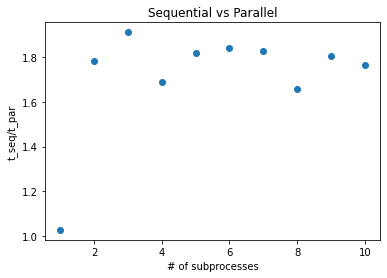

In [33]:
import matplotlib.pyplot as plt

x = list(range(1, len(numbers) + 1))
y = []
for i in range(len(numbers)):
    y.append(t_seq / t_par[i])

plt.scatter(x, y)
plt.title('Sequential vs Parallel')
plt.xlabel('# of subprocesses')
plt.ylabel('t_seq/t_par')
plt.show()

As can be seen, several processes work faster than the single one.
However, the more subprocesses we use for calculation, the less performance increase.
It can be the same or even worse. This happens because the CPU is limited of physical cores,
and it can't run a lot of processes simultaneously. In such cases when the number of subprocesses is more than physical
CPU cores, there won't be any increased performance.
What's more, the execution even can become slower, since the process swapping is happening.
Also, for multiprocessing, we used the `Queue` class from the `multiprocessing`
module which is thread-safe. However, to provide the thread-safe condition, this data structure must implement all the
required locking semantics, which also affects performance.
My laptop has two physical cores. That's why the multiprocessing program is nearly 2 times faster
than the sequential program, which can be seen on the graph: points are in the 1.5-2 range values of the y-axis.
